<b><font size = 20>Analyze Football Transfer Fee and Dynamics of Transfer Network</font></b>


# Dataset Football Summer Transfer Window 2022/2023 ⚽️

<img src = "https://d1af7m13b2f34i.cloudfront.net/media/sportstiger-1684064653991-original.jpg" alt = "Jenis-Jenis Data">

## Perihal Dataset

Dataset Football Summer Transfer Window 2022/2023 ⚽️ adalah kumpulan data yang berisi informasi tentang 2000 transfer sepak bola pada jendela transfer musim panas tahun 2022-2023. Data ini dikumpulkan dari TransferMarket.com, yang merupakan situs web kumpulan data tentang transfer pemain sepak bola dari seluruh dunia.


### Import Library & Dataset

In [5]:
!pip install pyvis -q

In [6]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
import networkx as nx
from pyvis.network import Network
from IPython.core.display import display, HTML
import time

In [7]:
# load dataset
df = pd.read_csv('2022_2023_football_summer_transfers_v2.csv')

### Deskripsi Fitur

Tampilan dataset secara keseluruhan

In [8]:
#show dataframe
display(df)

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
0,Erling Haaland,Centre-Forward,21,150.0,Germany,Bundesliga,Borussia Dortmund,England,Premier League,Manchester City,60.0,False
1,Antony,Right Winger,22,35.0,Netherlands,Eredivisie,Ajax Amsterdam,England,Premier League,Manchester United,95.0,False
2,Wesley Fofana,Centre-Back,21,40.0,England,Premier League,Leicester City,England,Premier League,Chelsea FC,80.4,False
3,Aurélien Tchouameni,Defensive Midfield,22,60.0,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Real Madrid,80.0,False
4,Darwin Núñez,Centre-Forward,23,55.0,Portugal,Liga Portugal,SL Benfica,England,Premier League,Liverpool FC,75.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Luke Freeman,Attacking Midfield,30,1.0,England,Championship,Sheffield United,England,Championship,Luton Town,0.0,False
1996,Antoine Leautey,Right Winger,26,1.0,Portugal,Liga Portugal,Gil Vicente FC,France,Ligue 2,Amiens SC,0.0,False
1997,Kal Naismith,Centre-Back,30,1.0,England,Championship,Luton Town,England,Championship,Bristol City,0.0,False
1998,Alireza Beiranvand,Goalkeeper,29,1.0,Belgium,Jupiler Pro League,Royal Antwerp FC,Iran,Persian Gulf Pro League,Persepolis FC,0.0,False


Informasi lengkap tentang dataset seperti kolom, jumlah baris, dam tipe data

In [9]:
#displays detailed information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2000 non-null   object 
 1   position      2000 non-null   object 
 2   age           2000 non-null   object 
 3   market_value  2000 non-null   float64
 4   country_from  1999 non-null   object 
 5   league_from   2000 non-null   object 
 6   club_from     2000 non-null   object 
 7   country_to    2000 non-null   object 
 8   league_to     2000 non-null   object 
 9   club_to       2000 non-null   object 
 10  fee           2000 non-null   float64
 11  loan          2000 non-null   bool   
dtypes: bool(1), float64(2), object(9)
memory usage: 174.0+ KB



Deskripsi Dataset
Nama Atribut : Keterangan
Name : Nama pemain


1. Position : Posisi pemain
2. Age : Umur pemain
3. Market Value : Nilai pasar pemain (juta euro)
4. country_from : Negara tempat pemain bermain
5. league_from : Liga yang dimainkan pemain
6. Club_from : Klub yang dimainkan pemain
7. Country_to : Negara tempat pemain akan bermain
8. League_to : Liga yang akan dimainkan pemain tersebut
9. Club_to : Klub yang akan dimainkan oleh pemain tersebut
10. Fee : Berapa banyak klub membayar pemain itu (juta euro)
11. Loan : Apakah itu pinjaman transfer? Benar jika ya.



Tampilan statistik deskriptif untuk kolom bersifat numerik

In [10]:
#describe dataframe for the whole row
df.describe()

,market_value,fee
count,2000.000000,2000.000000
mean,5.332300,2.928662
std,8.456724,7.936529
min,0.000000,0.000000
25%,1.500000,0.000000
50%,2.500000,0.000000
75%,5.000000,2.370000
max,150.000000,95.000000


### Cek Nilai NaN

In [11]:
#check NaN value
df.isnull().sum()

name            0
position        0
age             0
market_value    0
country_from    1
league_from     0
club_from       0
country_to      0
league_to       0
club_to         0
fee             0
loan            0
dtype: int64

Terdapat satu kolom yang memiliki nilai nan sebesar 1 baris, hal ini perlu ditangani karena data yang bersifat nan tidak dapat diproses oleh machine learning

In [12]:
#check information related to other columns
df[df.country_from.isnull()]

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
1264,Jemerson,Centre-Back,29,2.0,NaN,Without League,Without Club,Brazil,Série A,Clube Atlético Mineiro,0.0,False


Isi nilai nan berdasarkan riset yang telah dilakukan melalui transfermarket

In [13]:
#fill nan value based on research on transfermarkt
df.iloc[df[df.country_from.isnull()].index,[4,5,6]]=df[df.club_from=='FC Metz'].iloc[:1,4:7]

### Cek Nilai Tidak Terstruktur

In [14]:
#check unique value column 'age'
df.age.unique()

array(['21', '22', '23', '30', '27', '29', '24', '25', '26', '33', '20',
       '31', '28', '17', '19', '18', '32', '34', '35', '-', '37', '36',
       '16'], dtype=object)

Pada kolom 'age', terdapat satu nilai unik bukan numerikal yaitu '-'. Hal ini harus diatasi karena tipe kolom 'age' masih bersifat 'object'

In [15]:
#check information related to other columns
df[df.age=='-']

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
976,Hernani,Central Midfield,-,3.0,Italy,Serie B,Parma Calcio 1913,Italy,Serie B,Reggina 1914,0.0,True


Ganti nilai pada data yang tidak terstruktur menggunakan nilai hasil riset dari transfermarkt, lalu ubah tipe data kolom 'age' menjadi 'integer'

In [16]:
# fill in the player's age with blank information based on transfermarkt
df.loc[df[df.age=='-'].index,'age']=28

# change data type column 'age' to integer
df.age=df.age.astype('int')

### Cek Nilai Duplikat

In [17]:
# check duplicate value
df.duplicated().sum()

2

Terdapat 2 data yang bersifat duplikat. Data yang bersifat duplikat akan ditampilkan dibawah ini

In [18]:
# find duplicate value
df[df.duplicated(keep=False)==True]

,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,loan
976,Hernani,Central Midfield,28,3.0,Italy,Serie B,Parma Calcio 1913,Italy,Serie B,Reggina 1914,0.0,True
977,Hernani,Central Midfield,28,3.0,Italy,Serie B,Parma Calcio 1913,Italy,Serie B,Reggina 1914,0.0,True
1661,Cristian Ortíz,Left Winger,29,1.5,Mexico,Liga MX Apertura,Club Tijuana,Argentina,Liga Profesional,Defensa y Justicia,0.0,True
1662,Cristian Ortíz,Left Winger,29,1.5,Mexico,Liga MX Apertura,Club Tijuana,Argentina,Liga Profesional,Defensa y Justicia,0.0,True


Data duplikat merupakan data yang tidak perlu karena memiliki nilai yang sama. Selain itu data duplikat dapat menyebabkan bias sehingga harus dihilangkan

In [19]:
# drop duplicate value
df.drop_duplicates(inplace=True)

## Exploratory Data Analysis

In [20]:
# generate function
def data_profit(x,y):
    a=df.groupby([y]).sum(numeric_only=True).sort_values('fee',ascending=False).reset_index()[[y,'fee']]
    b=df.groupby([x]).sum(numeric_only=True).sort_values('fee',ascending=False).reset_index()[[x,'fee']]
    i=set(a[y].unique())-set(b[x].unique())
    i=pd.DataFrame({x:list(i),'fee':np.repeat((0), len(i))})
    j=set(b[x].unique())-set(a[y].unique())
    j=pd.DataFrame({y:list(j),'fee':np.repeat((0), len(j))})
    a,b=pd.concat([a,j]),pd.concat([b,i])
    a.rename(columns={y:str(y)[:-3]},inplace=True)
    b.rename(columns={x:str(x)[:-5]},inplace=True)
    c=pd.merge(b,a,left_on=str(y)[:-3],right_on=str(y)[:-3])
    c.rename(columns={'fee_x':'income'},inplace=True)
    c.rename(columns={'fee_y':'spent'},inplace=True)
    c['profit']=c['income']-c['spent']
    c.sort_values('profit',ascending=False,inplace=True)
    c=c.round(1)
    return c.reset_index(drop=True)

def visual_profit(data):
    data[:10].set_index(data.columns[0]).plot(kind='bar',figsize=(10,4))
    club=data[:10][data.columns[0]].tolist()
    income=data[:10]['income'].tolist()
    spent=data[:10]['spent'].tolist()
    profit=data[:10]['profit'].tolist()
    for i in range(len(club)):
        plt.text(i, income[i], income[i], ha = 'right')
        plt.text(i, spent[i], spent[i], ha = 'center')
        plt.text(i, profit[i], profit[i], ha = 'left')

def visual(data):
    data=data[:10]
    str1,str2 = "",""
    str1=str1.join(data.iloc[:,:1].columns.values.tolist())
    str2=str2.join(data.iloc[:,1:].columns.values.tolist())
    data.plot.bar(x=str1,y=str2,figsize=(6,4))
    x=data[str1].tolist()
    y=data[str2].tolist()
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

def connection(a,b):
    transfers=pd.DataFrame()
    for x in df[a].unique():
      for y in df[b].unique():
        z=len(df[(df[a]==x)&(df[b]==y)])
        if z > 0 :
          s=df[(df[a]==x)&(df[b]==y)].fee.sum()
          transfers=pd.concat([transfers,pd.DataFrame({a: [x], b: [y],'count': [z],'fee' : [s]})])
    transfers.sort_values('count',ascending=False,inplace=True)
    transfers=transfers.sort_values(['count','fee'],ascending=False).groupby('count').head(2000)
    transfers.reset_index(drop=True,inplace=True)
    return(transfers)

Daftar pemain dengan nilai transfer tertinggi pada summer transfer 2022/2023

,name,fee
0,Antony,95.00
1,Wesley Fofana,80.40
2,Aurélien Tchouameni,80.00
3,Darwin Núñez,75.00
4,Casemiro,70.65
5,Alexander Isak,70.00
6,Matthijs de Ligt,67.00
7,Marc Cucurella,65.30
8,Erling Haaland,60.00
9,Richarlison,58.00


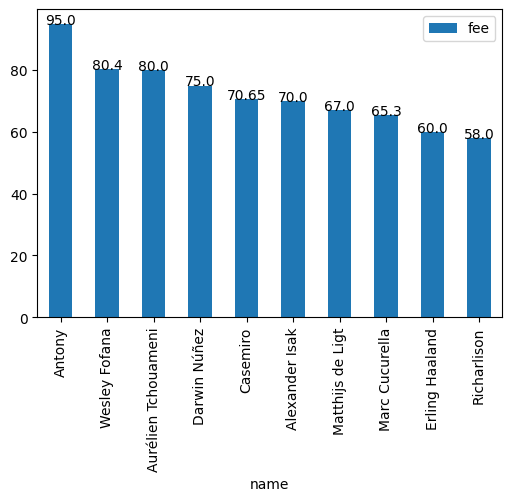

In [21]:
# the most expensive summer transfers
display(df.sort_values('fee',ascending=False)[['name','fee']].head(10).reset_index(drop=True))

# visualization ten expensive summer transfers
visual(df.sort_values('fee',ascending=False)[['name','fee']])

Daftar pemain dengan nilai market_value tertinggi pada summer transfer 2022/2023

,name,market_value
0,Erling Haaland,150.0
1,Matthijs de Ligt,70.0
2,Raheem Sterling,70.0
3,Sadio Mané,70.0
4,Romelu Lukaku,70.0
5,Federico Chiesa,65.0
6,Aurélien Tchouameni,60.0
7,Jules Koundé,60.0
8,Fabián Ruiz,55.0
9,Darwin Núñez,55.0


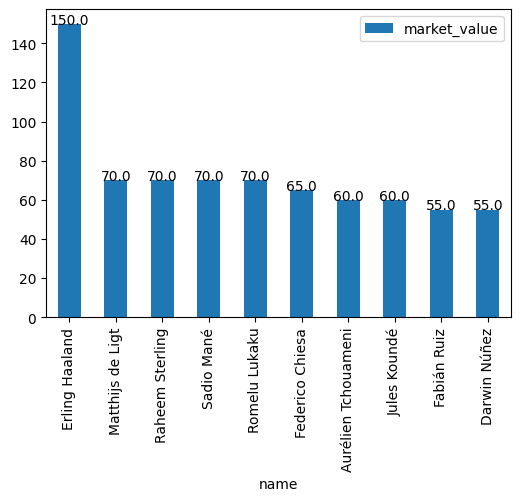

In [22]:
# the most valuable player based in summer transfers
display(df.sort_values('market_value',ascending=False)[['name','market_value']].head(10).reset_index(drop=True))

# visualization ten valuable player in summer transfers
visual(df.sort_values('market_value',ascending=False)[['name','market_value']])

Rata-rata usia pemain pada summer transfers 2022/2023

In [23]:
df.age.mean()

25.176176176176178

### Data Korelasi

Grafik heatmap dibawah digunakan untuk melihat nilai korelasi setiap kolom terhadap fee. Nilai korelasi berkisar antara -1 sampai 1. Semakin nilai korelasi mendekati 1 atau -1, maka semakin tinggi keterkaitannya

<ipython-input-24-39fdefa6c3b8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:,:-1].corr(), cmap="YlGnBu", annot=True)


<Axes: >

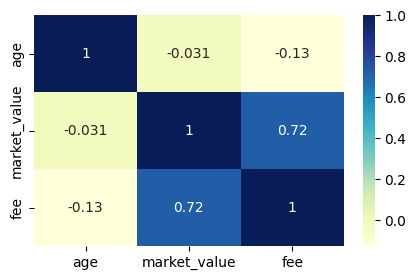

In [24]:
# correlation each numerical column with heatmap
plt.figure(figsize=(5,3))
sns.heatmap(df.iloc[:,:-1].corr(), cmap="YlGnBu", annot=True)

Karena korelasi tertinggi didapatkan antara hubungan kolom 'market_value' terhadap 'fee' dengan nilai korelasi 0.72. Lalu untuk kolom 'age' terhadap 'fee' memiliki nilai korelasi sebesar -0.13. Keduanya dapat ditampilkan pada scatterplot dibawah ini untuk melihat garis regresi secara linear

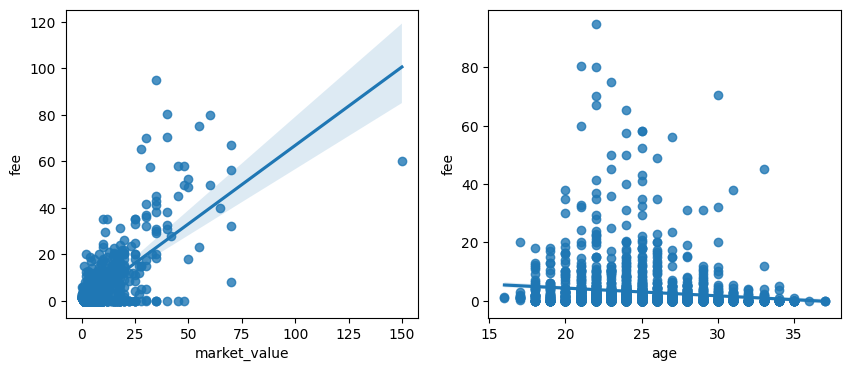

In [25]:
# relationship between market value to transfer fee
fig, axes = plt.subplots(1,2,figsize=(10, 4))
sns.regplot(data=df,y='fee',x='market_value', ax=axes[0])
sns.regplot(data=df,y='fee',x='age', ax=axes[1])
plt.show()

Berdasarkan grafik scatterplot diatas pada sebelah kiri, terlihat kolom 'market value' terhadap fee memiliki keterkaitan yang cukup tinggi sesuai dengan nilai korelasi yang telah disebutkan sebelumnya yaitu sebesar 0,72. Korelasi antara keduanya juga bersifat positif sehingga semakin tinggi nilai market_value maka semakin tinggi pula nilai 'fee'

Namun untuk grafik scatterplot sebelah kanan, terlihat bahwa kolom 'age' memiliki korelasi yang tidak begitu kuat terhadap 'fee'. Hubungan antara tiap korelasi tiap kolom juga dapat dilihat melalui grafik distribusi dibawah ini  

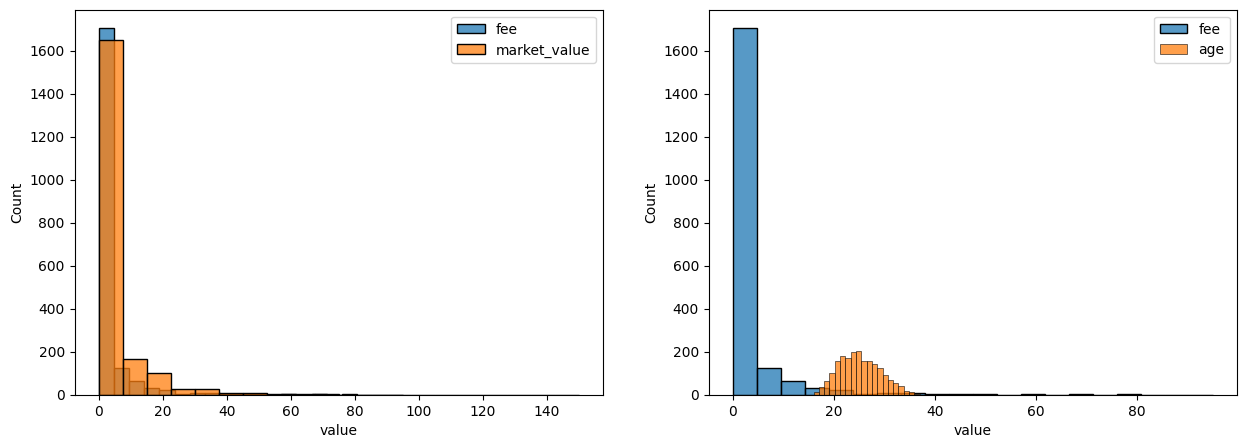

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df['fee'],kde=False,bins=20,label='fee')
sns.histplot(df['market_value'],kde=False,bins=20,label='market_value')
plt.xlabel('value')
plt.legend()

plt.subplot(1,2,2)
sns.histplot(df['fee'],kde=False,bins=20,label='fee')
sns.histplot(df['age'],kde=False,bins=20,label='age')
plt.xlabel('value')
plt.legend()

Dari data-data diatas dapat disimpulkan bahwa kolom yang berkorelasi atau paling berpengaruh terhadap kolom 'fee' adalah 'market_value'. Namun tidak menutup kemingkinan bahwa kolom lain tidak berpengaruh, meskipun korelasinya lemah tapi dia memilki kontribusi terhadap harga fee

Seperti pada kolom 'age', meskipun memiliki nilai korelasi negatif yang rendah, namun kami percaya bahwa kolom 'age' memiliki pengaruh terhadap nilai dari fee setiap pemain. Semakin rendah nilai 'age' maka semakin tinggi pula nilai fee pemain tersebut, begitupun sebaliknya.

### Data Distribusi

Berikut adalah persebaran umur setiap pemain berdasarkan posisinya. Kolom pada 'position' yang sebelumnya memiliki jumlah nilai unique yang banyak akan dimanipulasi terlebih dahulu menjadi 4 kelompok posisi yang terdiri dari attack, midfield, defence, dan goalkeeper

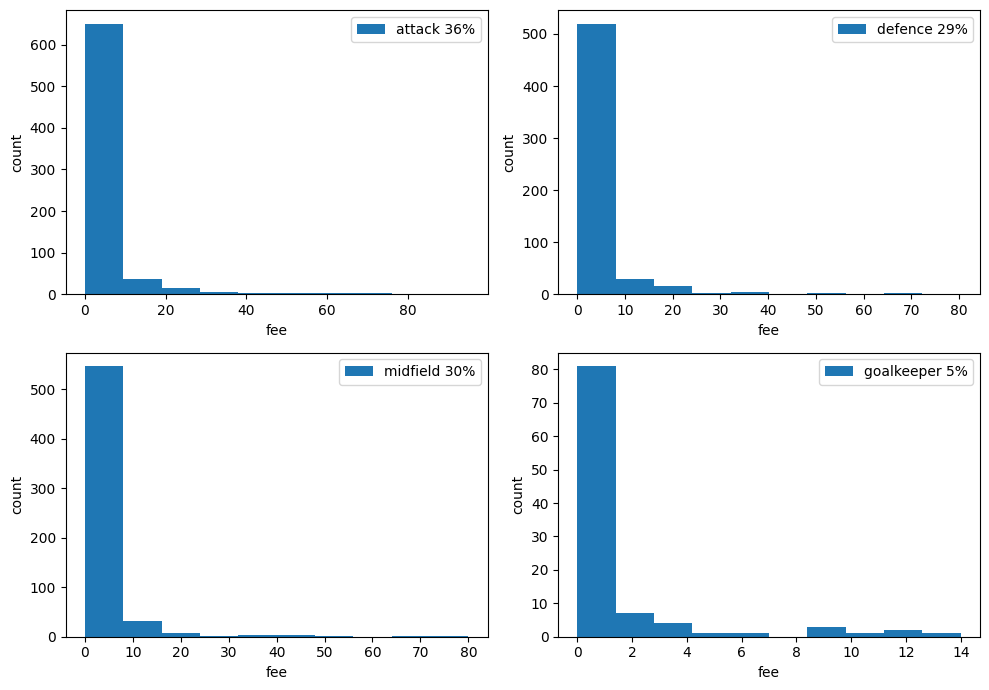

In [27]:
data=df.copy()
data.position=data.position.str.lower()
data.position.replace(['centre-forward','right winger','left winger','second striker'],'attack',inplace=True)
data.position.replace(['defensive midfield','central midfield','attacking midfield','left midfield','right midfield'],'midfield',inplace=True)
data.position.replace(['centre-back','left-back','right-back'],'defence',inplace=True)
plt.figure(figsize=(10,7))
i=0
for x in list(data['position'].unique()):
    i+=1
    plt.subplot(2, 2, i)
    label=f'{x}' + f' {round(len(data[data.position==x])*100/len(data))}%'
    plt.hist(data['fee'][data['position']==x],label=label)
    plt.xlabel('fee')
    plt.ylabel('count')
    plt.legend()
plt.tight_layout()
plt.show()

Histogram diatas ditampilkan dalam skala range x dan y yang sama. Berdasarkan histogram diatas, terlihat bahwa persebaran fee tidak terdistribusi secara normal. Hal ini berarti adanya nilai yang sangat timpang untuk beberapa interval kelas. Terlihat dari grafik tersebut bahwa kelas 'fee' yang memiliki jumlah paling banyak berada di kisaran 0 juta sampai 10 juta euro.  

Jika melihat dari peak tertinggi, untuk posisi 'attack', 'defence' dan 'midfield' memiliki peak di rentang 500 - 650 orang. Namun untuk posisi goalkeeper memiliki peak yang kecil karena jumlah transfer kiper memang sangat sedikit bila dibandingkan dengan posisi lainnya. Hal ini dikatakan wajar mengingat dalam setiap club hanya memiliki 2-3 buah saja seorang goalkeeper. Tentunya hal ini berbanding lurus dengan banyaknya transfer yang terjadi pada goalkeeper dengan jumlah lebih sedikit dibandingkan dengan posisi lainnya

### Data Komposisi

Kondisi keuangan club pasca transfer windows yang telah terjadi dengan rincian pendapatan, pengeluaran dan profit yang dihasilkannya

,club,income,spent,profit
0,Ajax Amsterdam,216.2,105.1,111.1
1,AS Monaco,117.0,43.5,73.5
2,Sporting CP,119.3,46.0,73.4
3,LOSC Lille,99.0,26.0,73.0
4,Brighton & Hove Albion,113.9,47.8,66.1
...,...,...,...,...
695,Newcastle United,2.3,136.0,-133.7
696,Nottingham Forest,7.0,161.0,-154.0
697,West Ham United,17.8,182.0,-164.2
698,Chelsea FC,58.8,282.0,-223.2


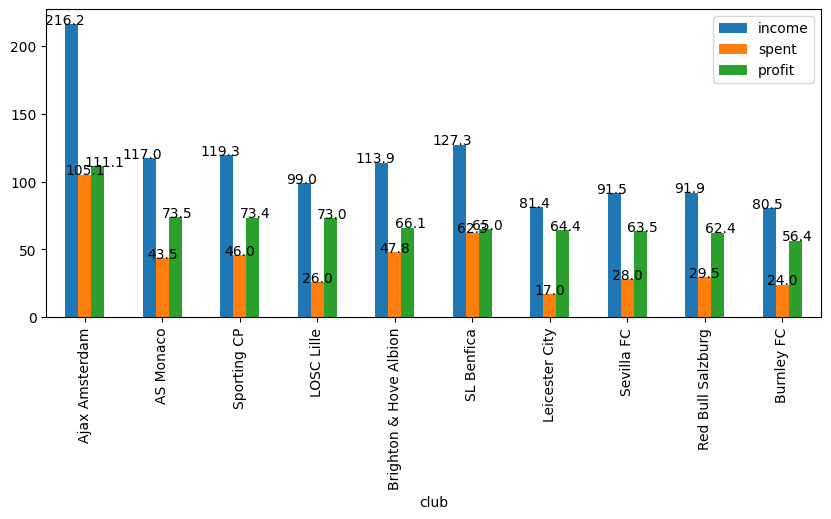

In [28]:
display(data_profit('club_from','club_to'))

visual_profit(data_profit('club_from','club_to'))

Berdasarkan grafik diatas, Ajax Amsterdam menjadi club dengan nilai profit tertinggi pada summer transfer 2022/2023 dengan nilai keuntungan 111 juta euro. Lalu disusul oleh AS Monaco, Sporting CP, dan LOSC Lile dengan keuntungan yang hampir sama persis di angka 73 juta euro. Namun terdapat dua club dengan keuangan terboros yaitu Manchester United dan Chelsea FC dengan nilai selisih diatas minus 200 juta euro

### Data Perbandingan

Data dibawah menunjukkan interaksi transfer yang terjadi setiap club dengan rincian jumlah transaksi yang pernah dilakukan pada summer transfer 2022/2023 serta nilai fee nya

In [29]:
# transfers that have been made between two clubs
data=df.copy()
data['count']=1
data=data[['club_from','club_to','fee','count']].groupby(['club_from','club_to']).sum()
data=data.reset_index('club_to').reset_index('club_from')
data=data.sort_values(['count','fee'],ascending=False).groupby('count').head(20000)
data.reset_index(drop=True).head(20)

,club_from,club_to,fee,count
0,AS Roma,Olympique Marseille,31.40,3
1,Hellas Verona,SS Lazio,14.10,3
2,Cagliari Calcio,FC Empoli,9.50,3
3,Fenerbahce,Hull City,7.50,3
4,Club León FC,Deportivo Toluca,5.70,3
5,Eintracht Frankfurt,1.FSV Mainz 05,1.50,3
6,Atalanta BC,AC Monza,0.00,3
7,Getafe CF,Granada CF,0.00,3
8,Ajax Amsterdam,Manchester United,152.37,2
9,Manchester City,Arsenal FC,87.20,2


### Analisis Jaringan

Berdasarkan data interaksi tiap club yang telah dibuat, dapat divisualisasikan dalam grafik jaringan yang merepresentasikan hubungan satu klub dengan klub lainnya

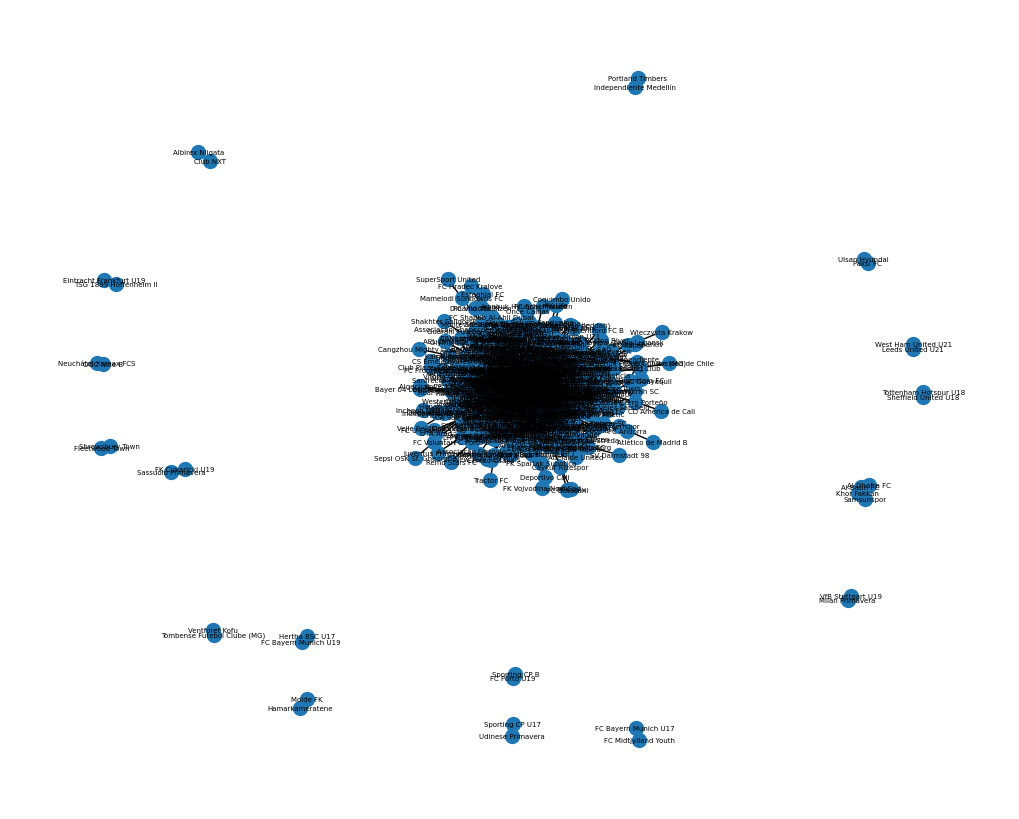

In [30]:
df1=data.copy()
figure(figsize=(10, 8))
G = nx.from_pandas_edgelist(df1, 'club_from', 'club_to', 'fee')
nx.draw(G, with_labels = True, node_size=100, font_size=5, node_shape='o')
plt.show()

In [31]:
leaderboard = {}
for x in G.nodes:
    leaderboard[x] = len(G[x])
s = pd.Series(leaderboard, name='connections')
df_con = s.to_frame().sort_values('connections', ascending=False)
df_con

,connections
SL Benfica,26
Olympique Marseille,25
Nottingham Forest,24
US Salernitana 1919,24
Hellas Verona,23
...,...
FC Augsburg U19,1
Club Plaza Colonia,1
Al-Ahli SC,1
Tottenham Hotspur U18,1


Karena jumlah informasi nilai unik sebuah klub sangat banyak, visualisasi jaringan transfer yang didapatkan saling bertumbukkan sehingga tidak terlihat jelas interaksi antar club secara keseluruhan. Namun jika hanya ingin melihat cukup dari satu klub saja, maka interaksi club tersebut terhadap klub lainnya dapat dicari

In [32]:
G['Manchester City']

AtlasView({'Arsenal FC': {'fee': 87.2}, 'Borussia Dortmund': {'fee': 77.5}, 'Girona FC': {'fee': 0.0}, 'Chelsea FC': {'fee': 56.2}, 'Leeds United': {'fee': 49.0}, 'RSC Anderlecht': {'fee': 13.0}, 'Sporting CP': {'fee': 8.5}, 'Borussia Mönchengladbach': {'fee': 5.0}, 'Burnley FC': {'fee': 3.0}, 'Arminia Bielefeld': {'fee': 0.0}, 'Club Athletico Paranaense': {'fee': 0.0}, 'ESTAC Troyes': {'fee': 0.0}, 'Middlesbrough FC': {'fee': 0.0}, 'Olympique Marseille': {'fee': 0.0}, 'São Paulo Futebol Clube': {'fee': 0.0}})

Untuk melihat visualisai secara keseluruhan yang lebih jelas, dapat dilakukan filter untuk menampilkan interaksi antar klub yang hanya dilakukan lebih dari satu kali.

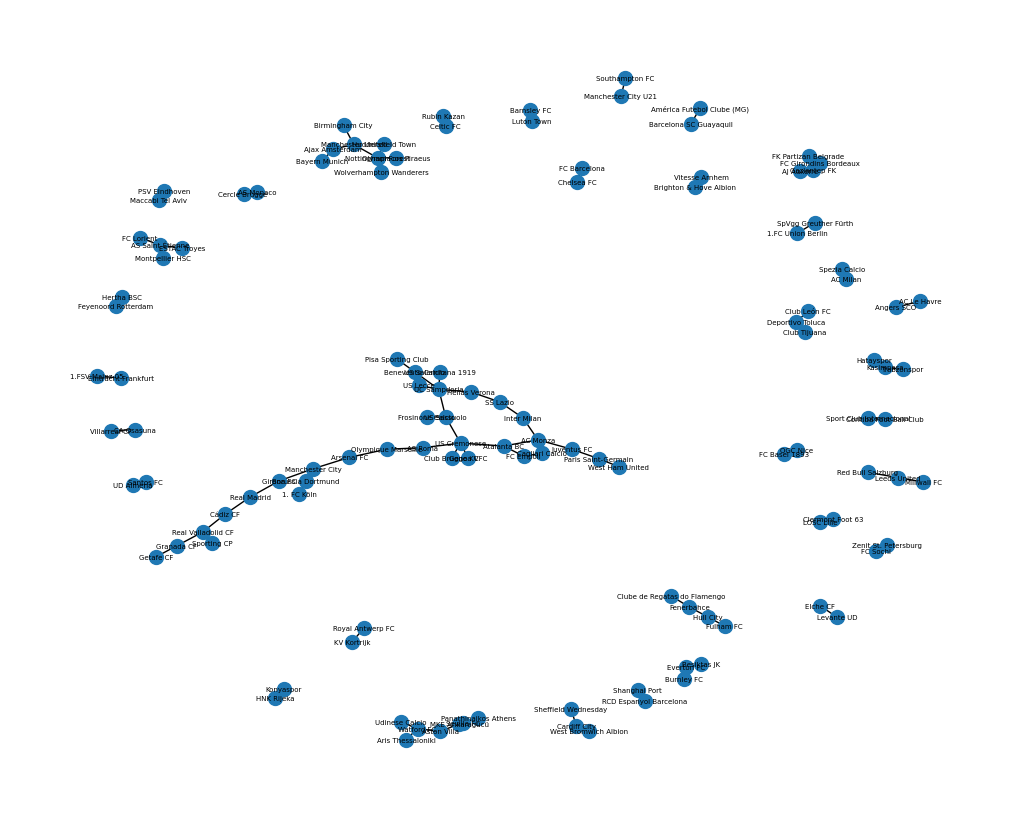

In [33]:
df2=data[data['count']>1]
figure(figsize=(10, 8))
G = nx.from_pandas_edgelist(df2, 'club_from', 'club_to','count')
nx.draw(G, with_labels = True, node_size=100, font_size=5, node_shape='o')
plt.show()

Untuk melihat visualisasi keseluruhan yang lebih jelas secara dinamis, bisa menggunakan library dari PyVis

In [34]:
#create vis network
net=Network(notebook=True, cdn_resources='in_line')
net.from_nx(G)

#show network with pyvis
net.show('example.html')
HTML('example.html')

example.html


## Data Preprocessing

``Lakukan data preprocessing seperlunya sesuai dengan kebutuhan pemodelan dan kondisi data. Preprocessing bisa berupa handling missing data, feature engineering, transformasi data, dan seleksi fitur.``

Seleksi beberapa data yang akan digunakan untuk pelatihan diawali dengan  filter data hanya untuk transfer yang berupa pembelian (bukan pinjaman). Lalu hilangkan data yang dianggap dapat menyebabkan bias seperti pembelian pemain secara free transfer dikarenakan tidak adanya nilai fee yang dikeluarkan serta pemain yang tidak memiliki nilai pasar atau market_value = 0.

In [35]:
# filter sensitive values that indicate biased data
data=df[(df.loan==False)&(df.fee>0)&(df.market_value>0)]
data.reset_index(drop=True,inplace=True)

# remove non-representative columns
data=data.iloc[:,[2,3,10]]

data.drop_duplicates(inplace=True)

Pisahkan variabel bebas (atribut) dengan variabel terikat (target). Kolom atribut terdiri dari kolom numerikal yang memiliki pengaruh terhadap kolom target. Kolom atribut terdiri dari 'age' dan 'market_value', sedangkan untuk kolom dijadikan target adalah 'fee'

In [36]:
# split target columns and convert categorical variables into numerical format
X=data.iloc[:,:-1]
y=data.iloc[:,-1:]

Pisahkan dataset menjadi dua bagian yakni data train dan data test. Data train akan dilatih menggunakan algoritma linear regression agar dapat mengenali pola dan karakteristik dari dataset menjadi sebuah model. Sementara data test digunakan sebagai data aktual untuk mengevaluasi seberapa baik hasil prediksi suatu model

In [37]:
# splits dataset into random subsets for train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(f"Train set = {X_train.shape} and {y_train.shape}")
print(f"Test set = {X_test.shape} and {y_test.shape}")

Train set = (663, 2) and (663, 1)
Test set = (166, 2) and (166, 1)


## Pemodelan

``Lakukan task analisis data menggunakan teknik yang sesuai dengan tujuan awal. Analisis data bisa berupa prediksi, clustering, ataupun association rule``

Latih data menggunakan algoritma Regresi Linear dengan mengatur nilai parameternya

In [38]:
# tuning parameter model linear regression
lr = LinearRegression()

# fitting model to training dataset
lr.fit(X_train.values,y_train.values.flatten())

LinearRegression()

## Evaluasi

``Lakukan evaluasi model yang dihasilkan menggunakan pengukuran yang sesuai dengan metode atau algoritma pemodelan dan mendukung tujuan awal``

Setelah model dibuat, maka dilakukan prediksi model terhadap data test. Untuk perbandingan nilai fee dari data test (aktual) dengan nilai fee dari model (prediksi) dapat dilihat pada tabel dibawah

In [39]:
y_pred=lr.predict(X_test)
data_pred=pd.DataFrame({'fee prediction': y_pred})
data_test=pd.concat([X_test.reset_index(drop=True),
                     y_test.reset_index(drop=True).rename(columns={'fee':'fee actual'})],axis=1)

data_testing=pd.concat([data_test,data_pred],axis=1)
data_testing

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,age,market_value,fee actual,fee prediction
0,27,1.0,0.273,1.154638
1,24,10.0,17.000,8.819381
2,27,70.0,56.200,53.348431
3,29,7.0,4.000,5.121991
4,24,1.8,1.800,2.616640
...,...,...,...,...
161,20,7.0,7.000,7.692562
162,24,2.5,1.880,3.146143
163,22,0.9,1.200,2.507090
164,28,1.6,0.300,1.322878


Evaluasi model yang telah dibuat menggunakan skor RMSE dan MAE. Nilai RMSE dan MAE merepresentasikan rata-rata selisih nilai error. Semakin rendah Nilai RMSE dan MAE, maka performa dari model tersebut semakin baik

In [40]:
# evaluate model
print('Linear Regression')
print(f"RMSE Score:", mse(y_test,lr.predict(X_test),squared=False).round(2))
print(f"MAE Score:", mae(y_test,lr.predict(X_test)).round(2))

Linear Regression
RMSE Score: 8.65
MAE Score: 3.33


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Baik RMSE dan MAE merepresentasikan rata2 nilai error yakni selisih dari nilai aktual dengan nilai prediksi. Nilai RMSE akan selalu lebih besar sama dengan MAE karena perhitungan RMSE merupakan hasil kuadrat yang diakarkan sehingga menghukum lebih besar kesalahan dari nilai error.

Dengan nilai RMSE dan MAE yang telah ditampilkan sebelumnya, kami menganggap bahwa hasil dari model yang telah dibuat bekerja dengan baik

### Prediksi Worth it or Not

Untuk mengaplikasikan model yang telah dibuat, kami akan melakukan sebuah prediksi nilai fee pada transfer yang benar-benar baru saja terjadi (summer transfer 2023/2024). Proses ini kami lakukan untuk mengetahui sejauh mana nilai fee yang worth it terhadap seuatu pemain

<img src = "https://pbs.twimg.com/media/Fzu5U_PX0A0KqeX.jpg:large" width="250" height="300">
<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRe4mRnE71To3tml7xj_NeUekX8PWUWKqQ8lA&usqp=CAU" width="250" height="300">
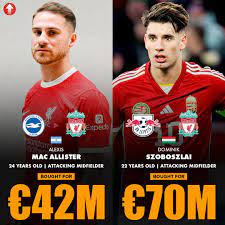


Kami mengambil 4 transfer yang terjadi baru-baru ini melalui data transfermarkt. Selanjutnya informasi mengenai  umur dan market value akan dimasukkan kedalam model untuk diprediksi berapa nilai fee yang sekiranya cocok untuk pemain tersebut. Hasil dari model akan kami cari selisihnya terhadap nilai fee aktual untuk menentukan apakah pemain tersebut sepadan atau tidak

In [41]:
# model predictions based on input data
print(f'Kai Havertz : {lr.predict([[24, 55]])[0].round(2)}M Euro')
print(f'Christopher Nkunku : {lr.predict([[25, 80]])[0].round(2)}M Euro')
print(f'Mac Allister : {lr.predict([[24, 65]])[0].round(2)}M Euro')
print(f'Dominik Szoboszlai : {lr.predict([[22, 50]])[0].round(2)}M Euro')

Kai Havertz : 42.86M Euro
Christopher Nkunku : 61.48M Euro
Mac Allister : 50.42M Euro
Dominik Szoboszlai : 39.65M Euro


Hasil diatas merupakan nilai 'fee' dari prediksi model yang sekiranya cocok untuk pemain tersebut

In [45]:
print(f'Kai Havertz         : {(lr.predict([[24, 55]])[0]-70).round(2)}M Euro : Pembelian Tidak Worth')
print(f'Christopher Nkunku  : {(lr.predict([[25, 80]])[0]-60).round(2)}M Euro   : Pembelian Normal')
print(f'Mac Allister        : {(lr.predict([[24, 65]])[0]-42).round(2)}M Euro   : Pembelian Sangat Worht')
print(f'Dominik Szoboszlai  : {(lr.predict([[22, 50]])[0]-70).round(2)}M Euro : Pembelian Tidak Worth ')

Kai Havertz         : -27.14M Euro : Pembelian Tidak Worth
Christopher Nkunku  : 1.48M Euro   : Pembelian Normal
Mac Allister        : 8.42M Euro   : Pembelian Sangat Worht
Dominik Szoboszlai  : -30.35M Euro : Pembelian Tidak Worth 


Setelah dicari selisihnya, maka didapatkan untuk keempat pemain tersebut mengenai sepadan atau tidaknya nilai fee transfer terjadi. Terdapat beberapa kondisi yang kami buat dalam mengevaluasi transfer sebuah pemain:

1. Jika Nilai fee aktual jauh lebih besar dibanding nilai fee dari model, maka kami menanggap bahwa pembelian pemain tersebut bersifat 'Tidak Worth'.

2. Jika Nilai fee aktual jauh mendekati nilai fee dari model dengan selisih yang tidak jauh berbeda, maka kami menanggap bahwa pembelian pemain tersebut bersifat 'Normal'.

3. Jika Nilai fee aktual jauh lebih kecil dibanding nilai fee dari model, maka kami menanggap bahwa pembelian pemain tersebut bersifat 'Sangat Worth'.

## Kesimpulan dan saran

Tujuan dari analisis data ini yaitu melakukan analisis
jaringan dalam membuat strategi transfer menggunakan algoritma regresi linear agar dapat menentukan "fee".
Dengan hasil analisis model yang telah dibuat, diharapkan klub sepakbola terutama manajer dan pelatih dapat mengambil keputusan berdasarkan data guna efisiensi anggaran.